<a href="https://colab.research.google.com/github/najnin26/Machine-Learning/blob/main/Basic/end_to_end_toy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Steps**

**0. Preprocess + EDA + Feature Selection**

**1. Extract input and output cols**

**2. train the model**

**5. Evaluate Scale the values**

**3. Train test split**

**4. T the model/model selection**

**6. Deploy the model**

In [42]:
import numpy as np
import pandas as pd

In [43]:
df=pd.read_csv('/content/drive/MyDrive/My_Code/Data_sets/placement.csv')

In [44]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [45]:
df.shape

(100, 4)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [47]:
df=df.iloc[:,1:]

In [48]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [49]:
import matplotlib.pyplot as plt

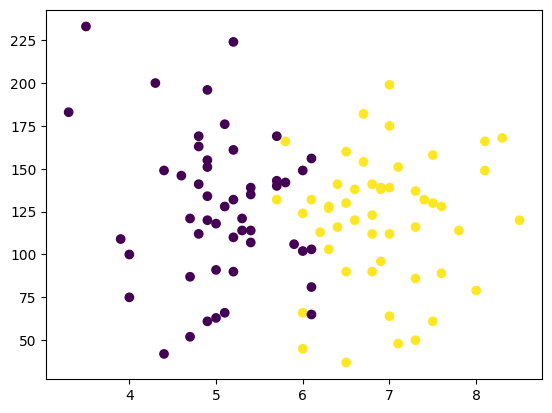

In [77]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [51]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [52]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [53]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [56]:
x_train

,cgpa,iq
11,6.9,138.0
23,4.7,87.0
19,5.2,132.0
24,4.7,121.0
53,8.3,168.0
...,...,...
66,6.9,96.0
97,6.7,182.0
5,7.1,48.0
88,4.4,149.0


In [57]:
y_train

11    1
23    0
19    0
24    0
53    1
     ..
66    1
97    1
5     1
88    0
93    1
Name: placement, Length: 90, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [60]:
x_train=scaler.fit_transform(x_train)

In [61]:
x_train

array([[ 0.80776226,  0.33919115],
       [-1.0939848 , -0.93277565],
       [-0.66176956,  0.18954799],
       [-1.0939848 , -0.08479779],
       [ 2.01796493,  1.08740691],
       [ 0.02977483, -1.98027772],
       [ 0.37554702,  0.41401272],
       [-0.7482126 ,  0.08978589],
       [-1.43975699,  1.88550372],
       [-0.9210987 ,  1.78574162],
       [ 1.32642055,  0.83800165],
       [ 1.32642055, -1.58122931],
       [ 1.84507884,  1.03752586],
       [ 0.28910397,  0.08978589],
       [-0.83465565, -1.53134826],
       [ 0.46199007, -0.85795407],
       [-0.57532651, -0.25938146],
       [-2.13130137,  2.70854106],
       [-1.18042784,  0.53871535],
       [-0.22955432,  0.18954799],
       [ 0.02977483, -0.55866777],
       [ 0.11621788,  0.18954799],
       [ 1.15353445, -0.95771618],
       [ 0.11621788,  0.7881206 ],
       [ 0.72131921, -0.85795407],
       [-1.0939848 , -1.80569404],
       [ 0.80776226,  0.36413167],
       [-1.69908613, -0.60854882],
       [-0.83465565,

In [62]:
x_test=scaler.transform(x_test)

In [63]:
x_test

array([[ 0.20266092, -0.28432199],
       [-0.48888346,  0.36413167],
       [ 1.32642055,  0.13966694],
       [ 0.28910397,  0.06484537],
       [ 0.11621788, -1.48146721],
       [ 1.15353445, -1.85557509],
       [-0.9210987 ,  0.66341798],
       [ 1.4128636 ,  0.08978589],
       [-0.66176956, -0.85795407],
       [-0.22955432,  1.11234743]])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf=LogisticRegression()

In [66]:
clf.fit(x_train,y_train)

LogisticRegression()

In [67]:
predict=clf.predict(x_test)

In [68]:
predict

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [69]:
y_test

99    1
12    0
83    1
70    1
56    0
77    1
89    0
30    1
28    0
84    0
Name: placement, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,predict)

0.9

In [72]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

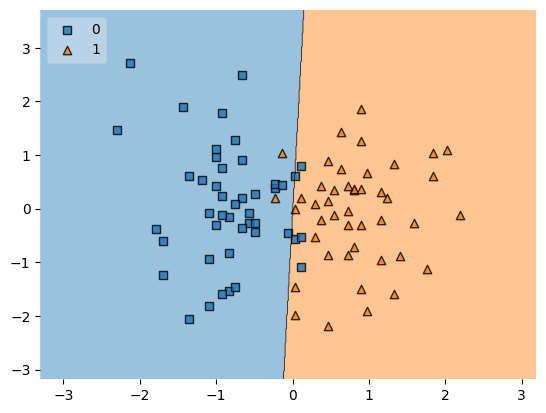

In [73]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)


In [74]:
import pickle

In [75]:
pickle.dump(clf,open('model.pkl','wb'))